<a href="https://colab.research.google.com/github/Bino-01/Air-Line-Passengers/blob/master/ARIMA_SARIMA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Importing Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Creating the DataFrame
air = pd.read_csv('/content/co2.csv')
air

,0
0,315.58
1,316.39
2,316.79
3,317.82
4,318.39
...,...
343,347.54
344,346.20
345,346.20
346,347.44


In [8]:
# Renaiming Columns
air.columns = ['CO2']
air

,CO2
0,315.58
1,316.39
2,316.79
3,317.82
4,318.39
...,...
343,347.54
344,346.20
345,346.20
346,347.44


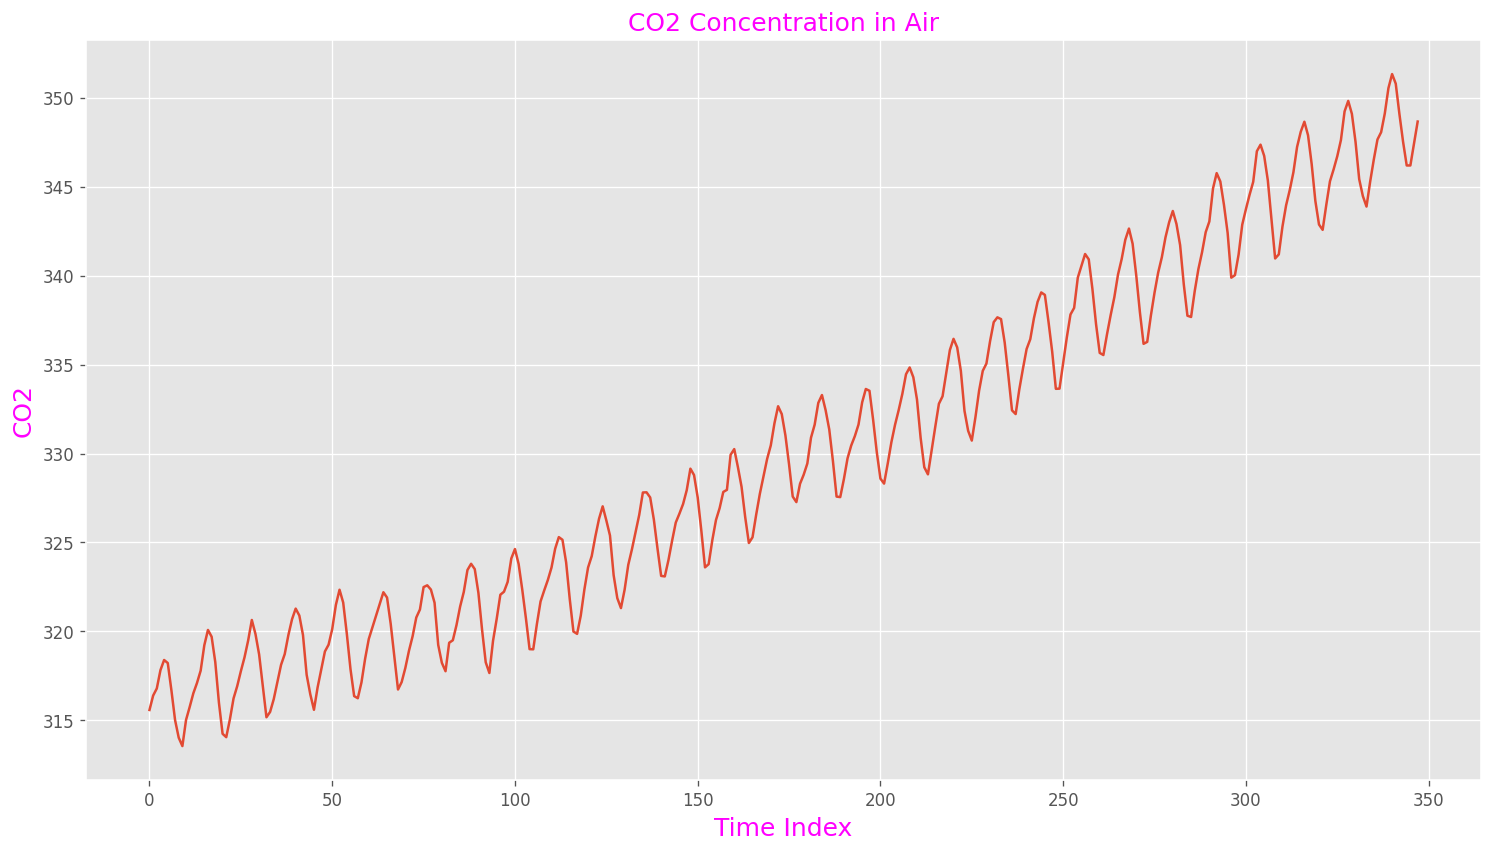

In [9]:
# Plotting the TS Air Pollution
plt.style.available
plt.style.use('ggplot')
plt.figure(figsize=(15,8), dpi = 120)
plt.xlabel('Time Index', color = 'magenta', fontdict = {'fontweight':'normal', 'fontstyle':'normal', 'fontsize':15})
plt.ylabel('CO2', color = 'magenta', fontdict = {'fontweight':'normal', 'fontstyle':'normal', 'fontsize':15})
plt.title('CO2 Concentration in Air', color = 'magenta', fontdict = {'fontweight':'normal', 'fontstyle':'normal', 'fontsize':15})

plt.plot(air)
plt.show()


In [10]:
# Running Augmented Dickey Fuller Test (ADF_Test) - Kwaitkai-Phillips-Schmidt-Shin (KPSS_Test) to confirm whether the TS is non-stationary
from statsmodels.tsa.stattools import adfuller, kpss
adf_test = adfuller(air['CO2'])
print('ADF Test: p-value',  adf_test[1])

kpss_test = kpss(air['CO2'])
print('KPSS Test: p-value', kpss_test[1])

"""
1- The ADF p-vallue is > 0.05 ====> TS is non-stationary
2- The KPSS p-value is < 0.05 ====> TS is non-stationary
The TS being non-stationary, therefore we
NB: ARIMA model will need the three main values that are p, d, q. These values are related to AR(p)  I(d)  MA(q))
"""

ADF Test: p-value 1.0
KPSS Test: p-value 0.01


/tmp/ipython-input-1905538172.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(air['CO2'])


'\n1- The ADF p-vallue is > 0.05 ====> TS is non-stationary\n2- The KPSS p-value is < 0.05 ====> TS is non-stationary\nThe TS being non-stationary, therefore we\nNB: ARIMA model will need the three main values that are p, d, q. These values are related to AR(p)  I(d)  MA(q))\n'

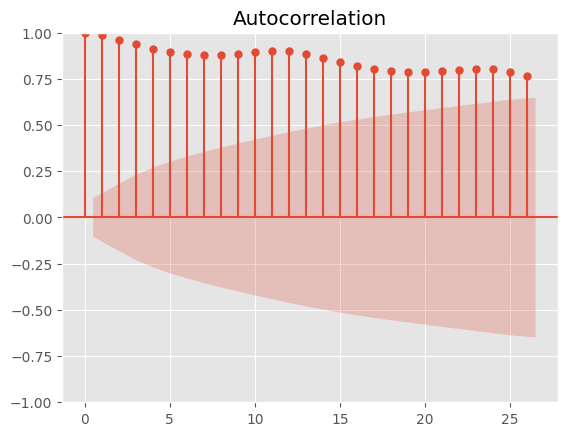

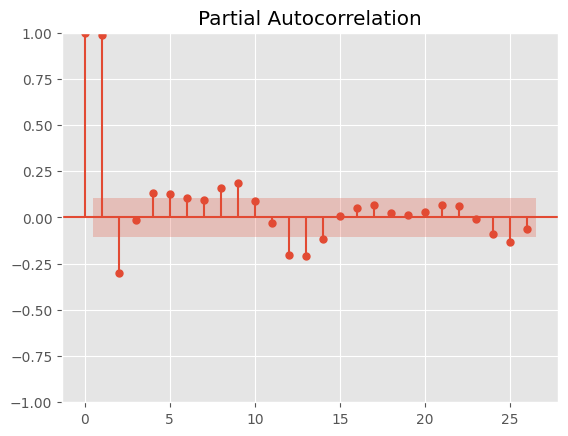

'\n1- From the ACF plot we find out thta several lags are statistically significant, therefore q = 0, 1, 2, 3, ...\n2- From the PACF plot we find out thta several lags are statistically significant, therefore p = 0, 1, 2, 3, ... ARIMA (p,d,q) - ARIMA (p,d,q)\n - ARIMA (p,d,q)\n - ARIMA (1,d,1)\n - ARIMA (0,d,1)\n -\n\n'

In [11]:
# Plotting the ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(air), plot_pacf(air)
plt.show()

"""
1- From the ACF plot we find out thta several lags are statistically significant, therefore q = 0, 1, 2, 3, ...
2- From the PACF plot we find out thta several lags are statistically significant, therefore p = 0, 1, 2, 3, ... ARIMA (p,d,q) - ARIMA (p,d,q)
 - ARIMA (p,d,q)
 - ARIMA (1,d,1)
 - ARIMA (0,d,1)
 -

"""

<Figure size 1800x960 with 0 Axes>

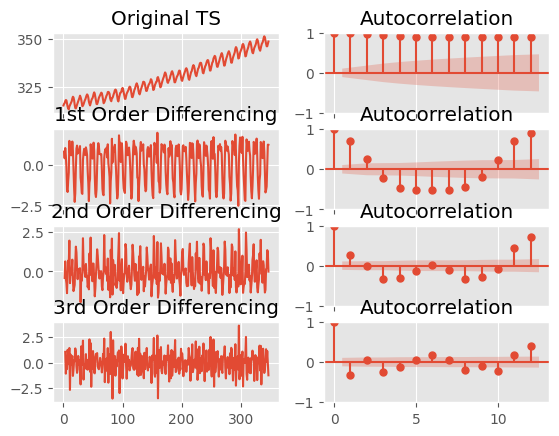

'\n1- Fromn the 1st order differencing our assessment is that the constant around the mean value, constant std, therefore, the TS is stationary and d = 1.\n2- From the ACF plot we find out that the lags are decaying sharply, meaning that the TS is Stationary and d = 1.\n3- ARIMA (0,1,0)\n - ARIMA (1,1,1)\n - ARIMA (0,1,1)\n - ARIMA(1,1,0)\n - ARIMA(0,1,0), .....\n'

In [12]:
# Let's Perform the Differencing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the Original TS
plt.style.use('ggplot')
plt.figure(figsize=(15,8), dpi = 120)

fig, axes = plt.subplots(4,2,sharex = 'col')
axes[0,0].plot(air); axes[0,0].set_title('Original TS')
plot_acf(air, lags = 12, ax = axes[0,1])

# Plotting the 1st Order Differecing
axes[1,0].plot(air.diff()); axes[1,0].set_title('1st Order Differencing')
plot_acf(air.diff().dropna(), lags = 12, ax = axes[1,1])

# Plotting the 2nd Order Differencing
axes[2,0].plot(air.diff().diff()); axes[2,0].set_title('2nd Order Differencing')
plot_acf(air.diff().diff().dropna(), lags = 12, ax = axes[2,1])

# Plotting the 3rd Order Differencing
axes[3,0].plot(air.diff().diff().diff()); axes[3,0].set_title('3rd Order Differencing')
plot_acf(air.diff().diff().diff().dropna(), lags = 12, ax = axes[3,1])
plt.show()

"""
1- Fromn the 1st order differencing our assessment is that the constant around the mean value, constant std, therefore, the TS is stationary and d = 1.
2- From the ACF plot we find out that the lags are decaying sharply, meaning that the TS is Stationary and d = 1.
3- ARIMA (0,1,0)
 - ARIMA (1,1,1)
 - ARIMA (0,1,1)
 - ARIMA(1,1,0)
 - ARIMA(0,1,0), .....
"""

In [13]:
# Grenerating Different ARIMA(0,1,0) in order to select the best
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(air, order = (0,1,0))
model_fit = model.fit()
model_fit.summary()

"""
1- AIC Akaike Information Criterion allows to determine whether the model is good at predicting, and the lower the value the better.
2- BIC Bayesian Information Criterion allows to determine whether the model is good at monitring/managing model complexity (features, variables, ..), and the lower the value the better.
3- Hannan Quinn Information Criterion (HQIC) allow to select the best model.
NB: For these three metrics the smaller the value the better the model.
4- From the analysis carried out below, we can conclude that the best model is ARIMA (2,1,1)
"""

'\n1- AIC Akaike Information Criterion allows to determine whether the model is good at predicting, and the lower the value the better.\n2- BIC Bayesian Information Criterion allows to determine whether the model is good at monitring/managing model complexity (features, variables, ..), and the lower the value the better.\n3- Hannan Quinn Information Criterion (HQIC) allow to select the best model.\nNB: For these three metrics the smaller the value the better the model.\n4- From the analysis carried out below, we can conclude that the best model is ARIMA (2,1,1)\n'

In [14]:
# Generation the 2nd model of ARIMA (1,1,0)
model = ARIMA(air, order = (1,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  348
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -427.101
Date:                Wed, 21 Jan 2026   AIC                            858.201
Time:                        01:01:08   BIC                            865.900
Sample:                             0   HQIC                           861.266
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7059      0.043     16.558      0.000       0.622       0.789
sigma2         0.6851      0.063     10.813      0.000       0.561       0.809
===================================================================================
Ljung-Box (L1) (Q):                  42.16   Jarque-Bera (JB):                 5.79
Prob(Q):                              0.00   Prob(JB):                         0.06
Heteroskedasticity (H):               1.13   Skew:                             0.16
Prob(H) (two-sided):                  0.52   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
# Creating 3rd ARIMA model (2,1,1)
model = ARIMA(air, order = (2,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  348
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -335.983
Date:                Wed, 21 Jan 2026   AIC                            679.967
Time:                        01:01:08   BIC                            695.364
Sample:                             0   HQIC                           686.098
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5393      0.033     46.721      0.000       1.475       1.604
ar.L2         -0.8368      0.036    -23.398      0.000      -0.907      -0.767
ma.L1         -0.8202      0.044    -18.786      0.000      -0.906      -0.735
sigma2         0.4033      0.029     13.924      0.000       0.347       0.460
===================================================================================
Ljung-Box (L1) (Q):                   1.77   Jarque-Bera (JB):                10.24
Prob(Q):                              0.18   Prob(JB):                         0.01
Heteroskedasticity (H):               1.07   Skew:                             0.42
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# Comparing ARIMAs Using a single set of code
from statsmodels.tsa.arima.model import ARIMA

orders = [(0,1,0),(0,1,1), (1,1,0),(1,1,1), (2,1,1), (1,1,2), (3,1,1), (1,1,3)]
for order in orders:
      try:
          model = ARIMA(air, order = order)
          fit = model.fit()
          print(f'ARIMA{order}: AIC= {fit.aic:.3f}, BIC = {fit.bic:.3f}, HQIC = {fit.hqic:.3f}')
      except Exception as e:
          print(f'ARIMA{order} failed: {e}')

# Based on this other analysis, we can still concludethat ARIMA (2,1,1) is the best model.


ARIMA(0, 1, 0): AIC= 1095.244, BIC = 1099.094, HQIC = 1096.777
ARIMA(0, 1, 1): AIC= 889.839, BIC = 897.538, HQIC = 892.905
ARIMA(1, 1, 0): AIC= 858.201, BIC = 865.900, HQIC = 861.266
ARIMA(1, 1, 1): AIC= 813.568, BIC = 825.116, HQIC = 818.166
ARIMA(2, 1, 1): AIC= 679.967, BIC = 695.364, HQIC = 686.098
ARIMA(1, 1, 2): AIC= 777.046, BIC = 792.443, HQIC = 783.176
ARIMA(3, 1, 1): AIC= 681.917, BIC = 701.163, HQIC = 689.580
ARIMA(1, 1, 3): AIC= 759.257, BIC = 778.504, HQIC = 766.920


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [17]:
# Lets Split the Dataset between training and testing sets
tot = len(air)
win = 12
diff = tot - win

In [18]:
# Splitting the Dataset
tot = len(air)
num_obs_ahead = 12
diff = tot - num_obs_ahead

train = air[ :diff]
test = air[diff:]

In [19]:
# Using the best ARIMA (2,1,1) for Forecasting
model = ARIMA(train, order = (2,1,1))
fit = model.fit()

forecast = fit.forecast(steps = num_obs_ahead, alpha = 0.05)
confins = fit.get_forecast(steps = num_obs_ahead).summary_frame()

# Defininf Upper Bound and Lower bound
forecast_val = pd.Series(forecast, index = test.index)
lower_bound = pd.Series(confins['mean_ci_lower'], index = test.index)
upper_bound = pd.Series(confins['mean_ci_upper'], index = test.index)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


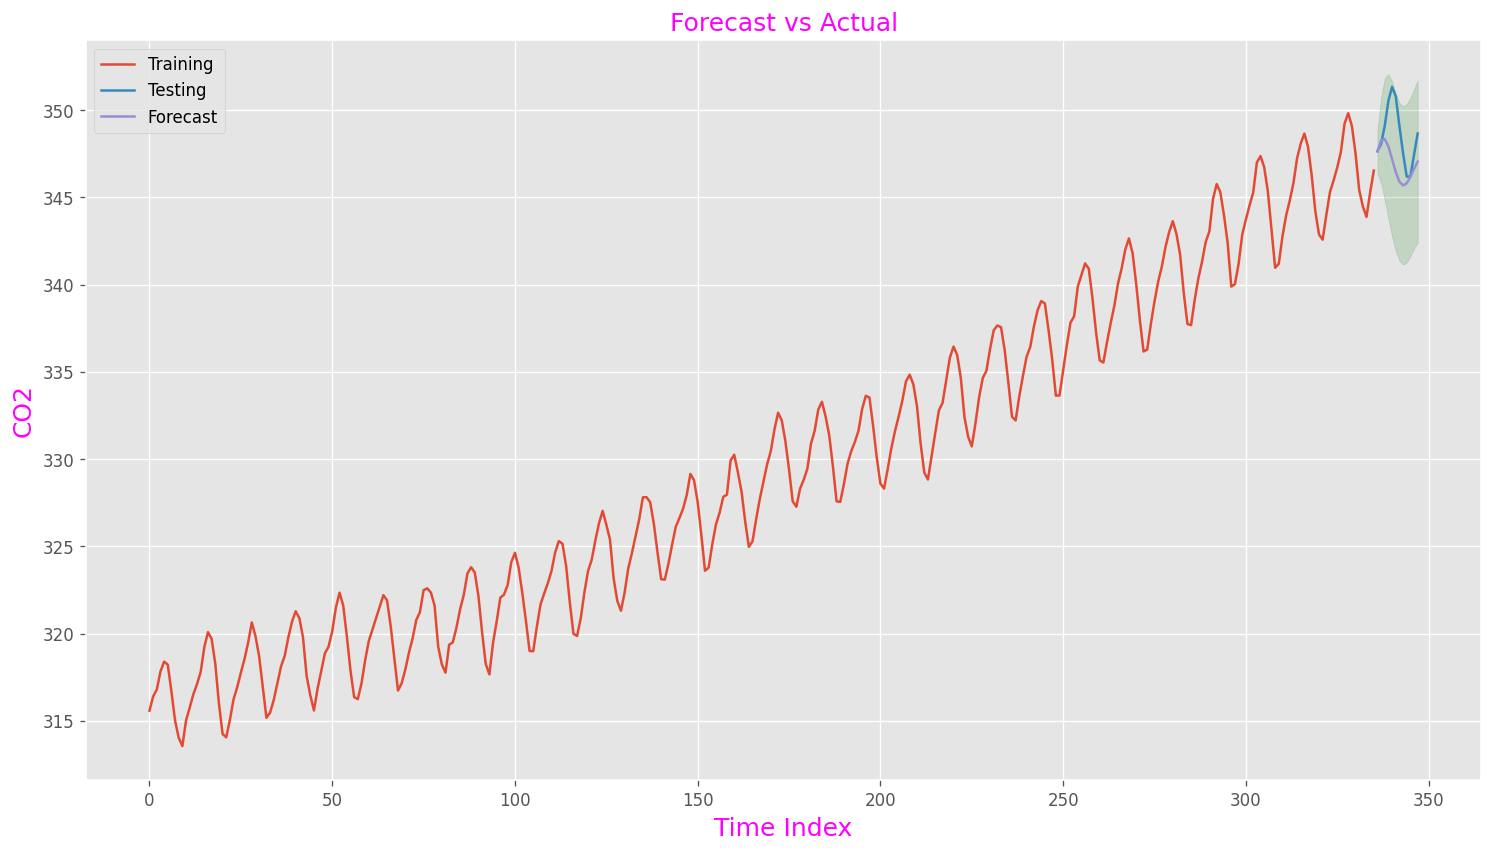

In [20]:
# Now Let's Plot the Focasted Values
plt.style.use('ggplot')
plt.figure(figsize = (15,8), dpi = 120)
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Testing')
plt.plot(forecast_val, label = 'Forecast')
plt.fill_between(lower_bound.index, lower_bound, upper_bound, color = 'g', alpha = 0.15)
plt.xlabel('Time Index', color = 'magenta', fontdict = {'fontweight':'normal', 'fontstyle':'normal', 'fontsize':15})
plt.ylabel('CO2', color = 'magenta', fontdict = {'fontweight':'normal', 'fontstyle':'normal', 'fontsize':15})
plt.title('Forecast vs Actual', color = 'magenta', fontdict = {'fontweight':'normal', 'fontstyle':'normal', 'fontsize':15})
plt.legend(loc = 'best')
plt.show()

In [49]:
# Error Determination / Accuracy Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
mse = mean_squared_error(test, forecast_val)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast_val)
r2 = r2_score(test, forecast_val)

print(f'MSE = {mse:f}')
print(f'RMSE = {rmse:f}')
print(f'MAE = {mae:f}')
print(f'R2 = {r2:f}') # model is better and can explain 90.7% variances in the dataset.

MSE = 0.246202
RMSE = 0.496188
MAE = 0.386310
R2 = 0.907115


In [41]:
# ARIMA is poor at dealing with seasonality, therefore we created the Seasonal ARIMA = SARIMA (p,d,d)X(P,D,Q,m)
from statsmodels.tsa.statespace.sarimax import SARIMAX
models = SARIMAX(air, order = (2,1,1), seasonal_order = (2,1,1,12))
fits = models.fit()
fits.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                CO2   No. Observations:                  348
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                 -63.761
Date:                            Wed, 21 Jan 2026   AIC                            141.522
Time:                                    01:30:06   BIC                            168.221
Sample:                                         0   HQIC                           152.166
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4509      0.125      3.622      0.000       0.207       0.695
ar.L2          0.1339      0.081      1.661      0.097      -0.024       0.292
ma.L1         -0.8042      0.118     -6.810      0.000      -1.036      -0.573
ar.S.L12       0.0101      0.064      0.158      0.875      -0.115       0.136
ar.S.L24      -0.0511      0.066     -0.779      0.436      -0.180       0.077
ma.S.L12      -0.8528      0.049    -17.539      0.000      -0.948      -0.758
sigma2         0.0815      0.007     11.850      0.000       0.068       0.095
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.28
Prob(Q):                              0.97   Prob(JB):                         0.53
Heteroskedasticity (H):               0.91   Skew:                             0.01
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
# Forecasting with SARIMA
# Using the best SARIMA (2,1,1)X(2,1,1,12) for Forecasting
models = SARIMAX(train, order = (2,1,1), seasonal_order = (2,1,1,12))
fits = models.fit()

forecasts = fits.forecast(steps = num_obs_ahead, alpha = 0.05)
confins = fits.get_forecast(steps = num_obs_ahead).summary_frame()

# Defininf Upper Bound and Lower bound
forecast_vals = pd.Series(forecasts, index = test.index)
lower_bounds = pd.Series(confins['mean_ci_lower'], index = test.index)
upper_bounds = pd.Series(confins['mean_ci_upper'], index = test.index)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


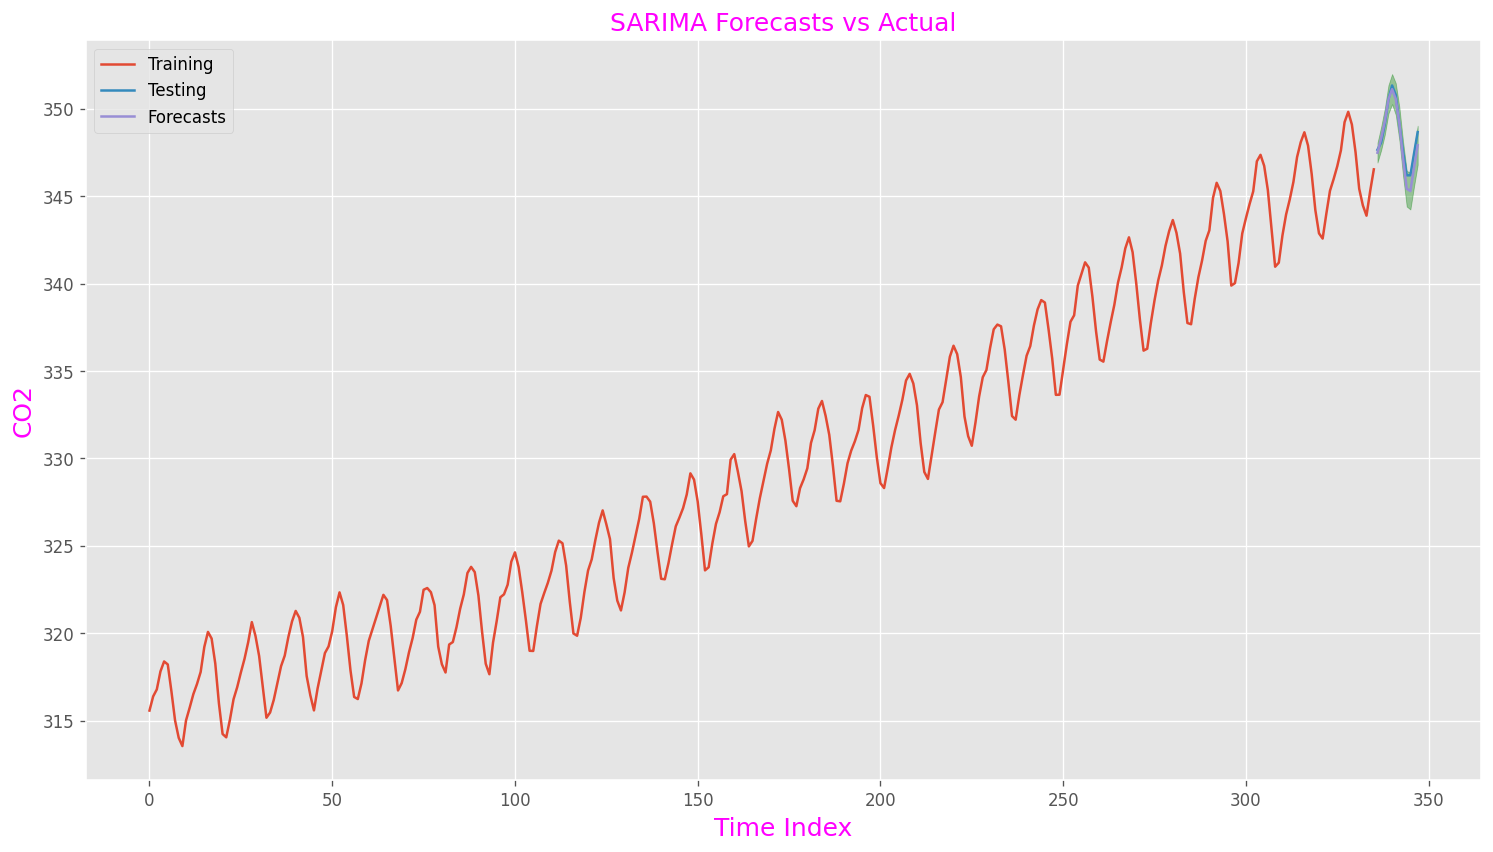

In [44]:
# Now Let's Plot the Focasted Values
plt.style.use('ggplot')
plt.figure(figsize = (15,8), dpi = 120)
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Testing')
plt.plot(forecast_vals, label = 'Forecasts')
plt.fill_between(lower_bound.index, lower_bound, upper_bound, color = 'g', alpha = 0.35)
plt.xlabel('Time Index', color = 'magenta', fontdict = {'fontweight':'normal', 'fontstyle':'normal', 'fontsize':15})
plt.ylabel('CO2', color = 'magenta', fontdict = {'fontweight':'normal', 'fontstyle':'normal', 'fontsize':15})
plt.title('SARIMA Forecasts vs Actual', color = 'magenta', fontdict = {'fontweight':'normal', 'fontstyle':'normal', 'fontsize':15})
plt.legend(loc = 'best')
plt.show()

In [48]:
# Error Determination / Accuracy Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
mse = mean_squared_error(test, forecast_vals)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast_vals)
r2 = r2_score(test, forecast_vals)

print(f'MSE = {mse:f}')
print(f'RMSE = {rmse:f}')
print(f'MAE = {mae:f}')
print(f'R2 = {r2:f}') # model is better and can explain 90.7% variances in the dataset.

MSE = 0.246202
RMSE = 0.496188
MAE = 0.386310
R2 = 0.907115


In [65]:
# Using the another SARIMA (2,1,1)X(2,1,1,7) for Forecasting

# models = SARIMAX(train, order = (2,1,1), seasonal_order = (2,1,1,7))
#models = SARIMAX(train, order = (2,1,1), seasonal_order = (2,1,1,12))
models = SARIMAX(train, order = (2,1,1), seasonal_order = (2,1,1,18))
#models = SARIMAX(train, order = (2,1,1), seasonal_order = (2,1,1,24))

fits = models.fit()

forecasts = fits.forecast(steps = num_obs_ahead, alpha = 0.05)
confins = fits.get_forecast(steps = num_obs_ahead).summary_frame()

# Defininf Upper Bound and Lower bound
forecast_vals = pd.Series(forecasts, index = test.index)
lower_bounds = pd.Series(confins['mean_ci_lower'], index = test.index)
upper_bounds = pd.Series(confins['mean_ci_upper'], index = test.index)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


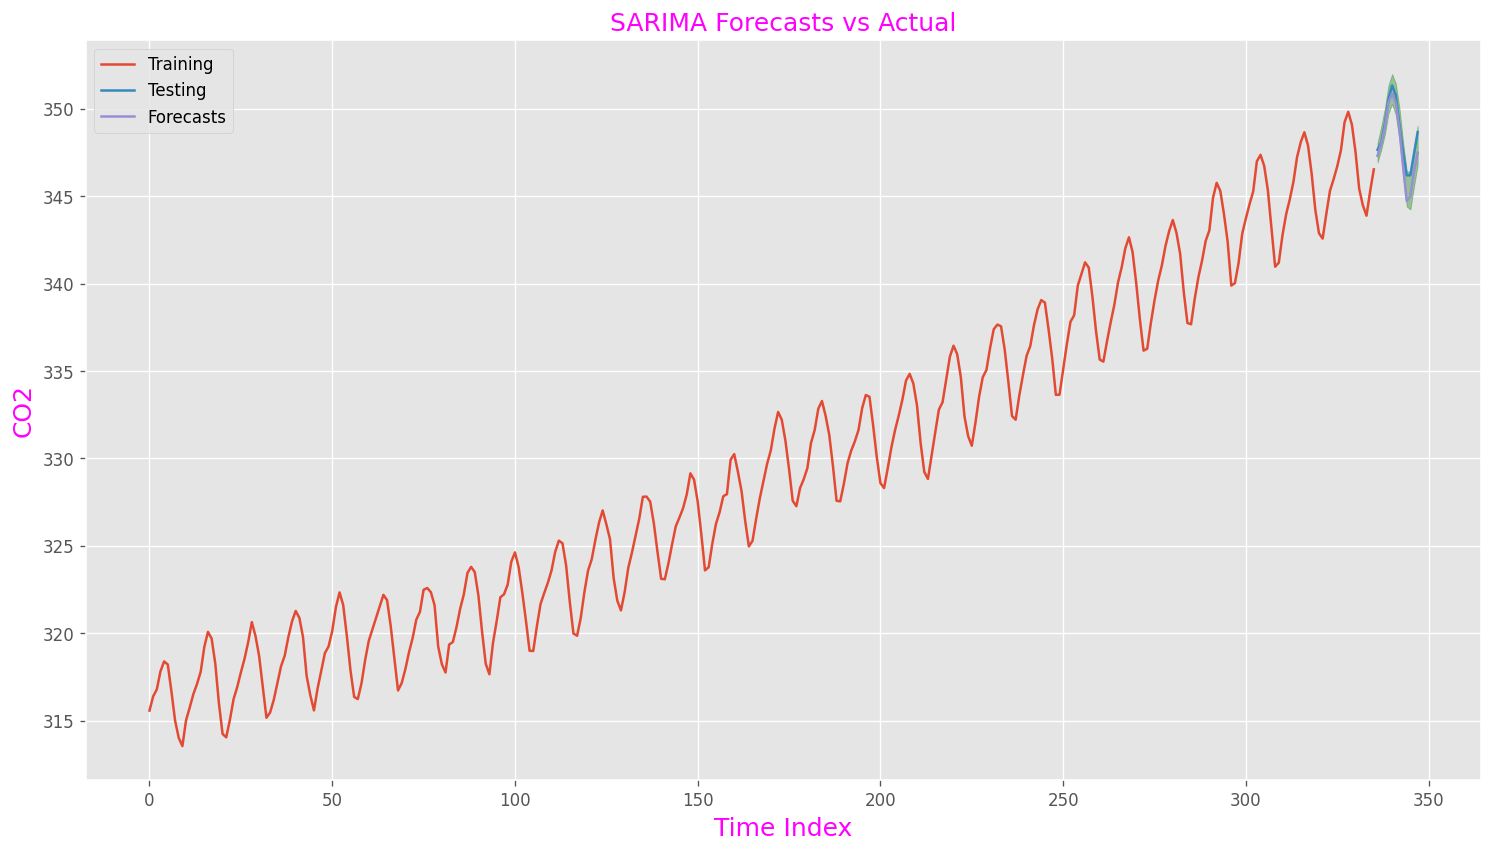

In [66]:
# Now Let's Plot the Focasted Values
plt.style.use('ggplot')
plt.figure(figsize = (15,8), dpi = 120)
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Testing')
plt.plot(forecast_vals, label = 'Forecasts')
plt.fill_between(lower_bound.index, lower_bound, upper_bound, color = 'g', alpha = 0.35)
plt.xlabel('Time Index', color = 'magenta', fontdict = {'fontweight':'normal', 'fontstyle':'normal', 'fontsize':15})
plt.ylabel('CO2', color = 'magenta', fontdict = {'fontweight':'normal', 'fontstyle':'normal', 'fontsize':15})
plt.title('SARIMA Forecasts vs Actual', color = 'magenta', fontdict = {'fontweight':'normal', 'fontstyle':'normal', 'fontsize':15})
plt.legend(loc = 'best')
plt.show()

In [67]:
# Error Determination / Accuracy Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
mse = mean_squared_error(test, forecast_vals)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast_vals)
r2 = r2_score(test, forecast_vals)

print(f'MSE = {mse:f}')
print(f'RMSE = {rmse:f}')
print(f'MAE = {mae:f}')
print(f'R2 = {r2:f}') # model is better and can explain 90.7% variances in the dataset.

MSE = 0.617738
RMSE = 0.785963
MAE = 0.638220
R2 = 0.766946


In [ ]:
"""
1) SARIMA(2,1,1)X(2,1,1,7)



2)SARIMA(2,1,1)X(2,1,1,12)  MSE = 0.246202
RMSE = 0.496188
MAE = 0.386310
R2 = 0.907115

3) SARIMA(2,1,1)X(2,1,1,18)
MSE = 0.617738
RMSE = 0.785963
MAE = 0.638220
R2 = 0.766946

4) SARIMA(2,1,1)X(2,1,1,24)
MSE = 0.179159
RMSE = 0.423272
MAE = 0.338170
R2 = 0.932409

"""